In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re

In [2]:
path = "C:/Users/juan/Dropbox/mma/"

In [3]:
df = pd.read_csv(path+"sherdog_sample.csv", sep=",")

In [4]:
# Get the unique number at the end of the opponent and fighter name variables
df["opponent_num"] = df["opponent_link"].str.split("-").str[-1]
df["fighter_notxt"] = df["name"].str.split(".txt").str[0]
df["fighter_notxt"].head()
df["fighter_num"] = df["fighter_notxt"].str.split("-").str[-1]

In [5]:
# Get a clean version of each fighters name 
df["fighter_space"]=df["fighter_notxt"].str.replace("-"," ")
df["clean_name"] = df["fighter_space"].str.extractall(r"([A-Za-z ])").groupby(level=0).agg(''.join)
df['clean_name'] = df['clean_name'].str.strip()
df["clean_name"].head()

0             
1      A Cenan
2    A Gunawan
3    A Gunawan
4    A Gunawan
Name: clean_name, dtype: object

In [6]:
df["event_string"] = df["event_string"].str.upper()
df["ufc"] = df["event_string"].str.extract(r"(UFC)")
df["ufc_bin"] = df["ufc"] == "UFC"
df["ufc_bin"].describe()

count     552044
unique         2
top        False
freq      536860
Name: ufc_bin, dtype: object

In [7]:
df.head()

,result,opponent_link,event_link,event_string,date,method,referee,rounds,time,name,opponent_num,fighter_notxt,fighter_num,fighter_space,clean_name,ufc,ufc_bin
0,win,/fighter/Takuya-Takahashi-81447,/events/Rising-On-11-Road-to-Champion-21161,RISING ON 11 - ROAD TO CHAMPION,Mar / 17 / 2012,TKO (Punches),NaN,2,2:51,1651-1651-40638.txt,81447,1651-1651-40638,40638,1651 1651 40638,,NaN,False
1,win,/fighter/Vitali-Walter-8564,/events/OC-1-Outsider-Cup-1-1856,OC 1 - OUTSIDER CUP 1,Jul / 12 / 2003,Submission (Armbar),NaN,1,2:45,A-Cenan-8554.txt,8564,A-Cenan-8554,8554,A Cenan 8554,A Cenan,NaN,False
2,loss,/fighter/Fendi-Suryanto-8037,/events/TPIFC-22-TPI-Fighting-Championship-22-...,TPIFC 22 - TPI FIGHTING CHAMPIONSHIP 22,Aug / 01 / 2003,Submission,NaN,1,4:56,A-Gunawan-31680.txt,8037,A-Gunawan-31680,31680,A Gunawan 31680,A Gunawan,NaN,False
3,win,/fighter/Dodik-Firmanto-8030,/events/TPIFC-17-TPI-Fighting-Championship-17-...,TPIFC 17 - TPI FIGHTING CHAMPIONSHIP 17,May / 02 / 2003,Decision (Majority Decision),NaN,3,5:00,A-Gunawan-31680.txt,8030,A-Gunawan-31680,31680,A Gunawan 31680,A Gunawan,NaN,False
4,win,/fighter/Jarot-Sumanianto-6826,/events/TPIFC-14-TPI-Fighting-Championship-14-...,TPIFC 14 - TPI FIGHTING CHAMPIONSHIP 14,Mar / 14 / 2003,Submission,NaN,1,0:56,A-Gunawan-31680.txt,6826,A-Gunawan-31680,31680,A Gunawan 31680,A Gunawan,NaN,False


In [8]:
df_unique_fighters = df.drop_duplicates(subset=['fighter_num'])
df_dict_num = df_unique_fighters.groupby(['fighter_num'])['clean_name'].apply(lambda grp: list(grp.value_counts().index)[0]).to_dict()
#df_dict_name = df_unique_fighters.groupby(['clean_name'])['fighter_num'].apply(lambda grp: list(grp.value_counts().index)[0]).to_dict()

In [9]:
df_dict_num

{'1': 'Tony Galindo',
 '10': 'Akira Shoji',
 '100': 'Oscar Oscar',
 '1000': 'Jay Winger',
 '10000': 'Max Lemme',
 '100003': 'Ben Westmoreland',
 '10001': 'Jimmy Raborn',
 '100013': 'Antonio Marcos da Silva',
 '100019': 'Edmilson Atanasio',
 '10002': 'Mick Cutajar',
 '100021': 'Adam Nash',
 '100023': 'Ronielmo Lopes',
 '100025': 'Oliver Porto',
 '10003': 'Joshua Burkman',
 '100031': 'Lucas Martins',
 '100033': 'Washington Rodrigues',
 '100035': 'Paulo Silva',
 '100037': 'Elias Macaco',
 '10004': 'Gilbert Sims',
 '100045': 'Jorge Alba',
 '100047': 'Mihail Cotruta',
 '100049': 'Richard Foster',
 '10005': 'Frank Young',
 '100051': 'Jeff Degenhardt',
 '10006': 'Emi Fujino',
 '100061': 'Curtis Harriott',
 '100063': 'Herbert Moon',
 '100065': 'Saeid Mirzaei',
 '10007': 'Seri Saito',
 '100073': 'Walison Pereira',
 '100075': 'Pedro Wilson',
 '100077': 'Paullemir da Silva Alves',
 '100079': 'Igor Miranda',
 '10008': 'Akiko Inoue',
 '100087': 'Kaleb DysertJohn',
 '100089': 'Rafael Indio',
 '10009

In [10]:
print(len(df_dict_num))

122178


In [11]:
df['opponent_name']= df['opponent_num'].map(df_dict_num)
df["fighter_upper"] = df["clean_name"].str.upper()
df["opponent_upper"] = df["opponent_name"].str.upper()

In [12]:
df.head()

,result,opponent_link,event_link,event_string,date,method,referee,rounds,time,name,opponent_num,fighter_notxt,fighter_num,fighter_space,clean_name,ufc,ufc_bin,opponent_name,fighter_upper,opponent_upper
0,win,/fighter/Takuya-Takahashi-81447,/events/Rising-On-11-Road-to-Champion-21161,RISING ON 11 - ROAD TO CHAMPION,Mar / 17 / 2012,TKO (Punches),NaN,2,2:51,1651-1651-40638.txt,81447,1651-1651-40638,40638,1651 1651 40638,,NaN,False,Takuya Takahashi,,TAKUYA TAKAHASHI
1,win,/fighter/Vitali-Walter-8564,/events/OC-1-Outsider-Cup-1-1856,OC 1 - OUTSIDER CUP 1,Jul / 12 / 2003,Submission (Armbar),NaN,1,2:45,A-Cenan-8554.txt,8564,A-Cenan-8554,8554,A Cenan 8554,A Cenan,NaN,False,Vitali Walter,A CENAN,VITALI WALTER
2,loss,/fighter/Fendi-Suryanto-8037,/events/TPIFC-22-TPI-Fighting-Championship-22-...,TPIFC 22 - TPI FIGHTING CHAMPIONSHIP 22,Aug / 01 / 2003,Submission,NaN,1,4:56,A-Gunawan-31680.txt,8037,A-Gunawan-31680,31680,A Gunawan 31680,A Gunawan,NaN,False,Fendi Suryanto,A GUNAWAN,FENDI SURYANTO
3,win,/fighter/Dodik-Firmanto-8030,/events/TPIFC-17-TPI-Fighting-Championship-17-...,TPIFC 17 - TPI FIGHTING CHAMPIONSHIP 17,May / 02 / 2003,Decision (Majority Decision),NaN,3,5:00,A-Gunawan-31680.txt,8030,A-Gunawan-31680,31680,A Gunawan 31680,A Gunawan,NaN,False,Dodik Firmanto,A GUNAWAN,DODIK FIRMANTO
4,win,/fighter/Jarot-Sumanianto-6826,/events/TPIFC-14-TPI-Fighting-Championship-14-...,TPIFC 14 - TPI FIGHTING CHAMPIONSHIP 14,Mar / 14 / 2003,Submission,NaN,1,0:56,A-Gunawan-31680.txt,6826,A-Gunawan-31680,31680,A Gunawan 31680,A Gunawan,NaN,False,Jarot Sumanianto,A GUNAWAN,JAROT SUMANIANTO


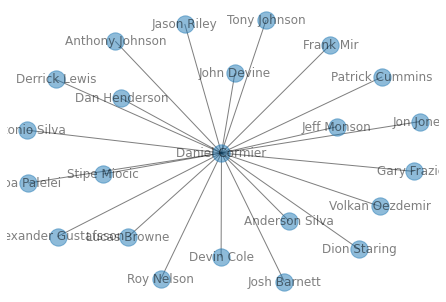

In [13]:
name = "Daniel Cormier"
name = name.upper()

fighter_subset = df[(df["fighter_upper"]==name) | (df["opponent_name"]==name)]

a = fighter_subset['fighter_num'].unique().tolist()
b = fighter_subset['opponent_num'].unique().tolist()

keys_to_extract = list(set(a + b))

key_subset = {key: df_dict_num[key] for key in keys_to_extract}

GA = nx.from_pandas_edgelist(fighter_subset, source="fighter_num", target="opponent_num")
nx.draw(GA, with_labels=True, pos = nx.spring_layout(GA, k=.2, iterations=20), alpha = .5, labels=key_subset)

In [17]:
def solo_network():
    name = str(input("Type a Fighter's Name: ")).upper()
    
    fighter_subset = df[(df["fighter_upper"]==name) | (df["opponent_upper"]==name)]

    a = fighter_subset['fighter_num'].unique().tolist()
    b = fighter_subset['opponent_num'].unique().tolist()

    keys_to_extract = list(set(a + b))

    key_subset = {key: df_dict_num[key] for key in keys_to_extract}

    df2 = df[(df['fighter_num'].isin(b)) & (df['opponent_num'].isin(b))]

    fighter_subset = pd.concat([fighter_subset, df2], ignore_index=True)
    
    if fighter_subset.empty :
        print('Invalid Name, Try again: \n')
        solo_network()

    else :
        GA = nx.from_pandas_edgelist(fighter_subset, source="fighter_num", target="opponent_num")
        fig = plt.figure(1, figsize=(10, 10))
        nx.draw(GA, with_labels=True, pos = nx.spring_layout(GA, k=.2, iterations=20), alpha = .5, labels=key_subset , font_weight='bold')

Type a Fighter's Name: daniel cormier


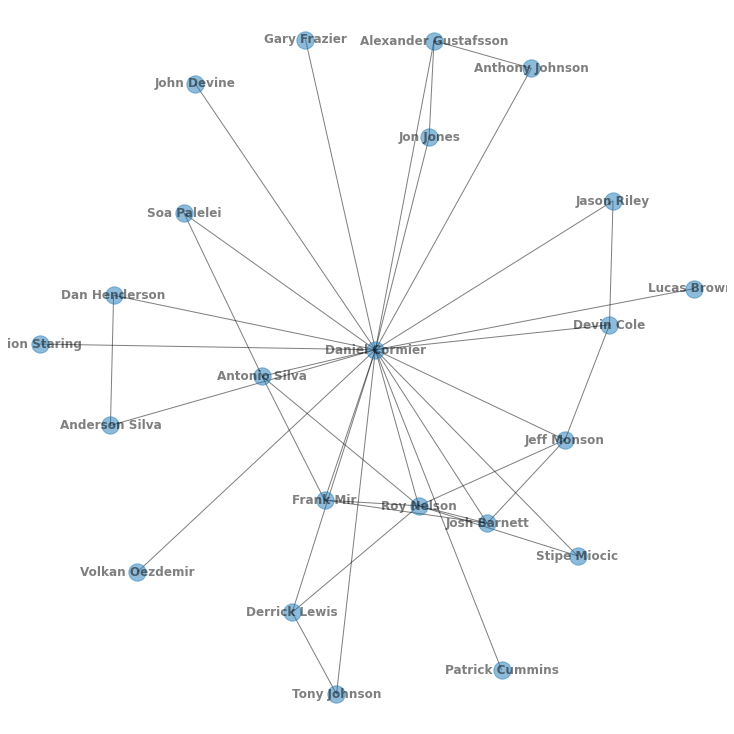

In [18]:
solo_network()